# MANUAL PCA

In [1]:
import numpy as np

OBSERVATIONS = 10
FEATURES = 5
N_COMPONENTS = 2

X = np.random.randn(OBSERVATIONS, FEATURES)
print(f'X (shape = {X.shape}):\n', X)

X (shape = (10, 5)):
 [[-4.61720490e-01  4.13015714e-01 -6.55270324e-01  5.63602015e-01
   1.83744209e+00]
 [-2.42262808e+00  2.35879451e-01 -1.77152477e-01  6.06716885e-01
  -1.17785972e-01]
 [ 1.11320289e+00  2.19833764e-01  3.34982269e-02 -2.00779753e+00
   5.67247150e-01]
 [-7.08909641e-01  2.15261409e-02 -1.62584652e-01  1.11694882e-03
  -1.93313599e-01]
 [ 1.43549413e+00  9.31447520e-01 -1.48418126e+00  1.62333639e+00
   2.19566435e-02]
 [-1.63041805e-01 -8.23217235e-01  1.70012151e+00 -2.16450348e+00
   1.25867640e+00]
 [-9.88925861e-01 -6.44803849e-02  9.73611705e-01  7.34026024e-01
   6.34938217e-01]
 [-3.06045694e-01  4.64219764e-01 -1.49767743e-01  4.34800244e-01
   1.05624609e+00]
 [ 2.44433433e+00  2.43846712e+00 -6.77079043e-02 -1.76665413e+00
  -3.06514760e-01]
 [ 4.38398842e-01  5.98335178e-01  1.07010294e+00  3.50207265e-01
   3.77869695e-01]]


In [2]:
X_centered = X - X.mean(axis=0)
cov = (X_centered.T @ X_centered) / (X.shape[0] - 1)
print(f'cov(X) (shape = {cov.shape}):\n', cov)

cov(X) (shape = (5, 5)):
 [[ 1.90394026e+00  7.68272287e-01 -2.41988378e-01 -6.93856318e-01
  -1.88693332e-01]
 [ 7.68272287e-01  7.08570061e-01 -3.58552552e-01  5.91573311e-04
  -2.79352966e-01]
 [-2.41988378e-01 -3.58552552e-01  8.42755029e-01 -5.90437791e-01
   1.44953528e-01]
 [-6.93856318e-01  5.91573311e-04 -5.90437791e-01  1.74941639e+00
  -4.77578221e-02]
 [-1.88693332e-01 -2.79352966e-01  1.44953528e-01 -4.77578221e-02
   4.94540180e-01]]


[[ 1.90394026e+00  7.68272287e-01 -2.41988378e-01 -6.93856318e-01
  -1.88693332e-01]
 [ 7.68272287e-01  7.08570061e-01 -3.58552552e-01  5.91573311e-04
  -2.79352966e-01]
 [-2.41988378e-01 -3.58552552e-01  8.42755029e-01 -5.90437791e-01
   1.44953528e-01]
 [-6.93856318e-01  5.91573311e-04 -5.90437791e-01  1.74941639e+00
  -4.77578221e-02]
 [-1.88693332e-01 -2.79352966e-01  1.44953528e-01 -4.77578221e-02
   4.94540180e-01]]


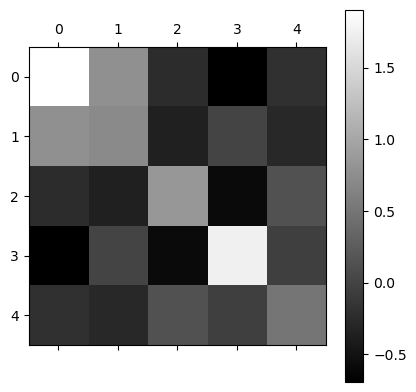

In [3]:
import matplotlib.pyplot as plt

print(np.cov(X_centered, rowvar=False))
plt.matshow(cov, cmap='gray')
plt.colorbar()
plt.show()

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(cov)
print('eigenvalues:\n', eigenvalues)

eigenvalues:
 [2.72268272 1.95520857 0.18182906 0.48953118 0.34997038]


In [5]:
idx = np.argsort(eigenvalues)[::-1]
print('argsort:\n', idx)

argsort:
 [0 1 3 4 2]


In [6]:
eigenvectors_sorted = eigenvectors[:,idx]
print('sorted eigenvectors:\n', eigenvectors_sorted)

sorted eigenvectors:
 [[ 0.77160176  0.29450231  0.36564033 -0.29284352  0.31376572]
 [ 0.3053491   0.38399333 -0.30043744 -0.058546   -0.81585584]
 [ 0.00828147 -0.55657654 -0.06562936 -0.8091033  -0.17663128]
 [-0.55044541  0.64863277  0.20315095 -0.48118075  0.0589929 ]
 [-0.09129029 -0.18792446  0.8546736   0.15694575 -0.44861068]]


In [7]:
PCs_manual = eigenvectors_sorted[:,:N_COMPONENTS]
print('principal components (manual):\n', PCs_manual.T)

principal components (manual):
 [[ 0.77160176  0.3053491   0.00828147 -0.55044541 -0.09129029]
 [ 0.29450231  0.38399333 -0.55657654  0.64863277 -0.18792446]]


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=N_COMPONENTS)
pca.fit(X)
print('eigenvalues (scikit-learn):\n', pca.explained_variance_)
print('principal components (scikit-learn):\n', pca.components_)

eigenvalues (scikit-learn):
 [2.72268272 1.95520857]
principal components (scikit-learn):
 [[ 0.77160176  0.3053491   0.00828147 -0.55044541 -0.09129029]
 [-0.29450231 -0.38399333  0.55657654 -0.64863277  0.18792446]]


In [9]:
print('eigenvalues (manual):\n', eigenvalues[idx[:N_COMPONENTS]])
print('eigenvalues (scikit-learn):\n', pca.explained_variance_)

eigenvalues (manual):
 [2.72268272 1.95520857]
eigenvalues (scikit-learn):
 [2.72268272 1.95520857]


In [10]:
print('eigenvectors (manual):\n', eigenvectors_sorted[:,:N_COMPONENTS].T)
print('eigenvectors (scikit-learn):\n', pca.components_)

eigenvectors (manual):
 [[ 0.77160176  0.3053491   0.00828147 -0.55044541 -0.09129029]
 [ 0.29450231  0.38399333 -0.55657654  0.64863277 -0.18792446]]
eigenvectors (scikit-learn):
 [[ 0.77160176  0.3053491   0.00828147 -0.55044541 -0.09129029]
 [-0.29450231 -0.38399333  0.55657654 -0.64863277  0.18792446]]


### explained variance

In [11]:
pca = PCA()
pca.fit(X)
print('eigenvalues (manual):\n', eigenvalues[idx])
print('eigenvalues (scikit-learn):\n', pca.explained_variance_)

eigenvalues (manual):
 [2.72268272 1.95520857 0.48953118 0.34997038 0.18182906]
eigenvalues (scikit-learn):
 [2.72268272 1.95520857 0.48953118 0.34997038 0.18182906]


In [12]:
print('explained variance ratio (manual):\n', eigenvalues[idx] / np.sum(eigenvalues))
print('explained variance ratio (scikit-learn):\n', pca.explained_variance_ratio_)
print()
print('cumulative sum:\n', np.cumsum(pca.explained_variance_ratio_))

explained variance ratio (manual):
 [0.47772885 0.34306588 0.08589439 0.0614067  0.03190419]
explained variance ratio (scikit-learn):
 [0.47772885 0.34306588 0.08589439 0.0614067  0.03190419]

cumulative sum:
 [0.47772885 0.82079473 0.90668912 0.96809581 1.        ]


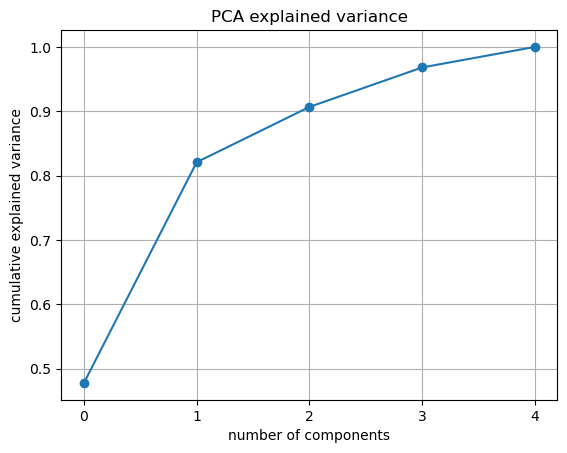

In [13]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'o-')
plt.xlabel('number of components')
plt.xticks(range(X.shape[1]))
plt.ylabel('cumulative explained variance')
plt.title('PCA explained variance')
plt.grid()
plt.show()

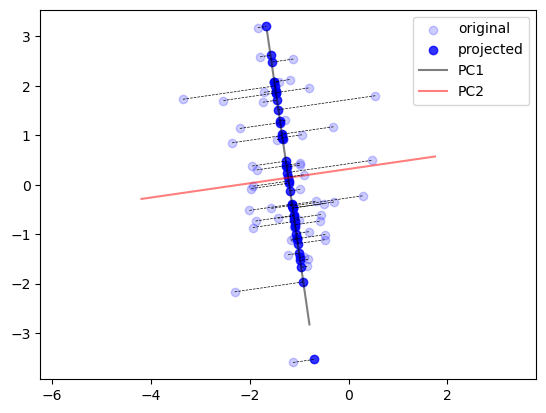

In [14]:
# points
mean = np.random.randn(2) # random mean
A = np.random.randn(2, 2) # random cov
cov = np.dot(A, A.T) # positive semi-definite
X = np.random.multivariate_normal(mean, cov, 50)

# pca
pca = PCA()
pca.fit(X)
X_pca = pca.transform(X)
X_pca[:, 1] = 0  # remove PC2 for viz
X_reconstructed = pca.inverse_transform(X_pca)

# pca line
pc1, pc2 = pca.components_
mean_x = pca.mean_
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
scaling_factor = np.linspace(-3, 3, 100)
pca_line1 = mean_x + scaling_factor[:, np.newaxis] * pc1
pca_line2 = mean_x + scaling_factor[:, np.newaxis] * pc2

# plot
plt.scatter(X[:, 0], X[:, 1], c='blue', alpha=0.2, label='original')
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c='blue', alpha=0.8, label='projected')
plt.plot(pca_line1[:, 0], pca_line1[:, 1], 'k-', alpha=0.5, label='PC1')
plt.plot(pca_line2[:, 0], pca_line2[:, 1], 'r-', alpha=0.5, label='PC2')

for i in range(len(X)):
    plt.plot([X[i, 0], X_reconstructed[i, 0]], [X[i, 1], X_reconstructed[i, 1]], 'k--', linewidth=0.5)

plt.axis('equal')
plt.legend()
plt.show()

# PCA ON IRIS

In [15]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
print(iris.target_names)
iris.frame

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [16]:
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print('explained variance (ie eigenvalues):', pca.explained_variance_)
print('explained variance ratio (ie normalized eigenvalues):', pca.explained_variance_ratio_)
print('cumulative sum:', np.cumsum(pca.explained_variance_ratio_))

explained variance (ie eigenvalues): [4.22824171 0.24267075]
explained variance ratio (ie normalized eigenvalues): [0.92461872 0.05306648]
cumulative sum: [0.92461872 0.97768521]


In [17]:
print('components:\n', pca.components_)
print('X_pca:\n', X_pca)

components:
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
X_pca:
 [[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.6488623

In [18]:
X_pca_manual = (X - X.mean(axis=0)).dot(pca.components_.T)
print('X_pca (manual):\n', X_pca_manual)
print()
print('same?', np.isclose(X_pca_manual , X_pca).all())

X_pca (manual):
             0         1
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
..        ...       ...
145  1.944110  0.187532
146  1.527167 -0.375317
147  1.764346  0.078859
148  1.900942  0.116628
149  1.390189 -0.282661

[150 rows x 2 columns]

same? True


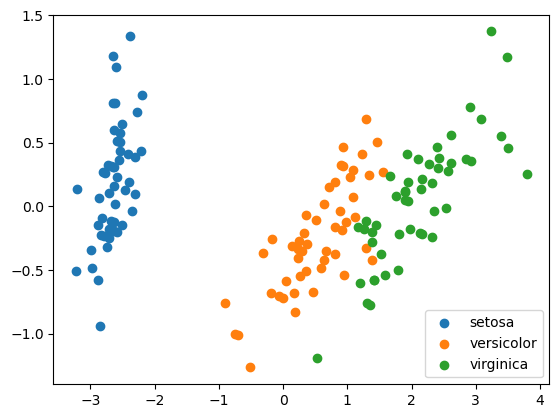

In [19]:
# plot 2D
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.legend()
plt.show()

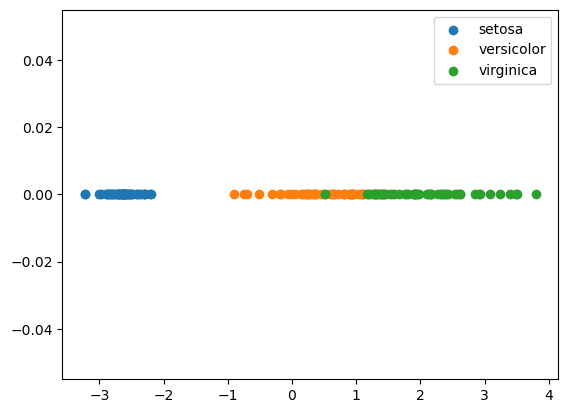

In [20]:
# plot 1D
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i], np.zeros_like(X_pca)[y == i], label=target_name)
plt.legend()
plt.show()

# PCA ON MNIST

In [21]:
from sklearn.datasets import load_digits

digits = load_digits(as_frame=True)
digits.frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


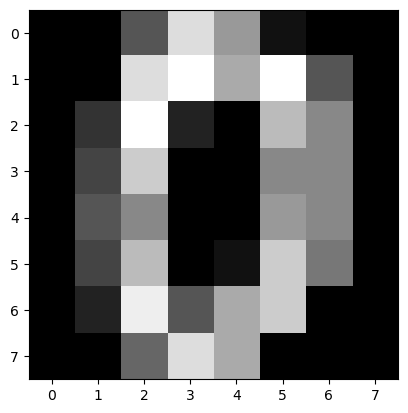

In [22]:
X = digits.data.to_numpy()
y = digits.target.to_numpy()

print(X[0].shape)
print(X[0])

plt.imshow(X[0].reshape(8, 8), cmap='gray')

In [23]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print('explained variance (ie eigenvalues):', pca.explained_variance_)
print('explained variance ratio (ie normalized eigenvalues):', pca.explained_variance_ratio_)
print('cumulative sum:', np.cumsum(pca.explained_variance_ratio_))

explained variance (ie eigenvalues): [179.0069301  163.71774688]
explained variance ratio (ie normalized eigenvalues): [0.14890594 0.13618771]
cumulative sum: [0.14890594 0.28509365]


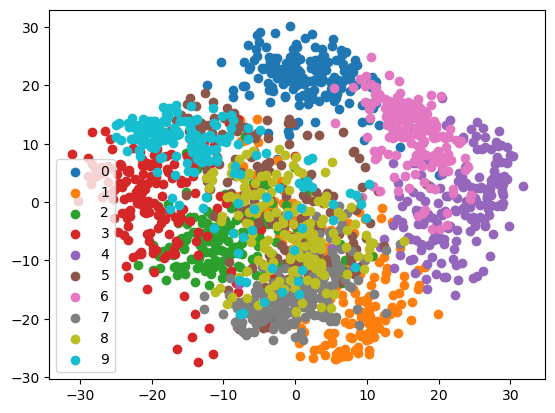

In [24]:
# plot 2D
for i, target_name in enumerate(digits.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name)
plt.legend()
plt.show()

explained variance (ie eigenvalues): [179.0069301  163.71774688 141.78843909]
explained variance ratio (ie normalized eigenvalues): [0.14890594 0.13618771 0.11794594]
cumulative sum: [0.14890594 0.28509365 0.40303959]


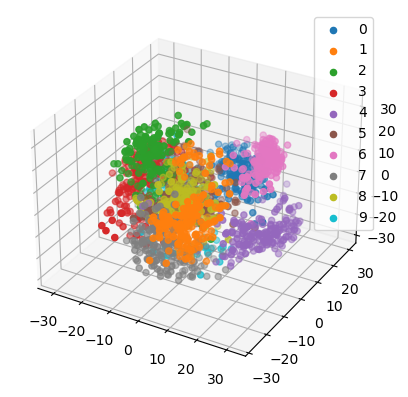

In [25]:
# plot 3D
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print('explained variance (ie eigenvalues):', pca.explained_variance_)
print('explained variance ratio (ie normalized eigenvalues):', pca.explained_variance_ratio_)
print('cumulative sum:', np.cumsum(pca.explained_variance_ratio_))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, target_name in enumerate(digits.target_names):
    ax.scatter(X_pca[y == i, 0], X_pca[y == i, 1], X_pca[y == i, 2], label=target_name)
ax.legend()
plt.show()

# PCA ON MNIST - COMPRESSION

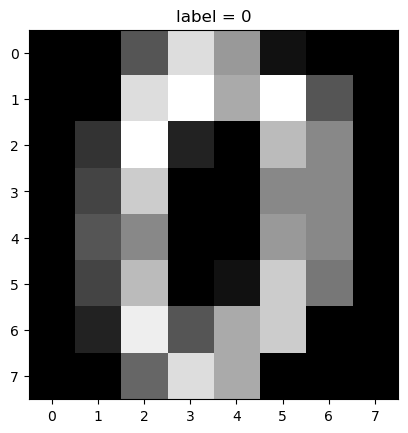

In [26]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

plt.imshow(X[0].reshape(8,8), cmap='gray')
plt.title(f'label = {y[0]}')
plt.show()

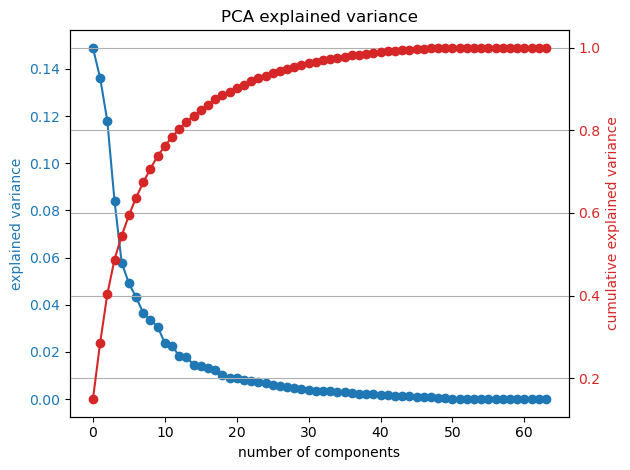

In [27]:
pca = PCA()
X_pca = pca.fit_transform(X)

# plot explained variance and cumulative explained variance on the same plot
fig, ax1 = plt.subplots()
ax1.plot(pca.explained_variance_ratio_, 'o-', color='tab:blue')
ax1.set_xlabel('number of components')
ax1.set_ylabel('explained variance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(np.cumsum(pca.explained_variance_ratio_), 'o-', color='tab:red')
ax2.set_ylabel('cumulative explained variance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('PCA explained variance')
plt.grid()
plt.tight_layout()
plt.show()

In [28]:
pca = PCA(0.8)
X_pca = pca.fit_transform(X)
print('PCA explained variance:\t\t', np.sum(pca.explained_variance_ratio_).round(3))
print('X_pca shape:\t\t\t', X_pca.shape, end=' ')
print(f'[% compression ({X.shape[1]} -> {pca.n_components_}):', 100 * (X.shape[1] - X_pca.shape[1]) / X.shape[1], end='%]\n')

X_pca_inverse = pca.inverse_transform(X_pca)
print('X_pca_inverse shape:\t\t', X_pca_inverse.shape)

PCA explained variance:		 0.803
X_pca shape:			 (1797, 13) [% compression (64 -> 13): 79.6875%]
X_pca_inverse shape:		 (1797, 64)


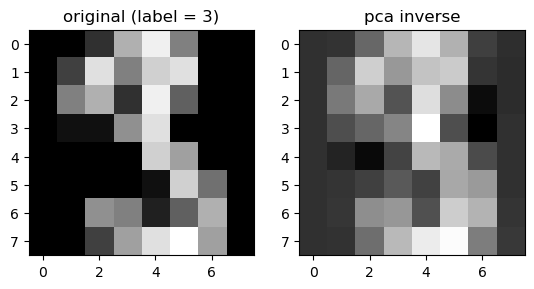

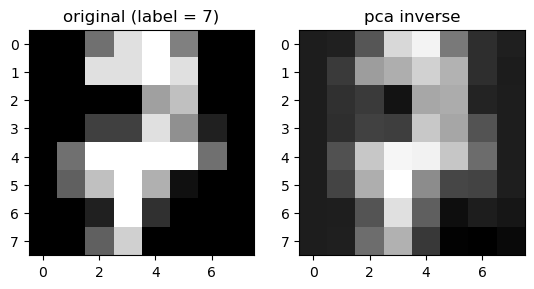

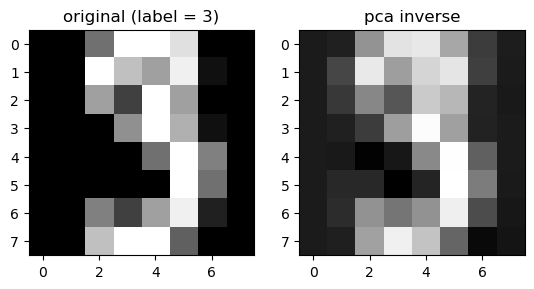

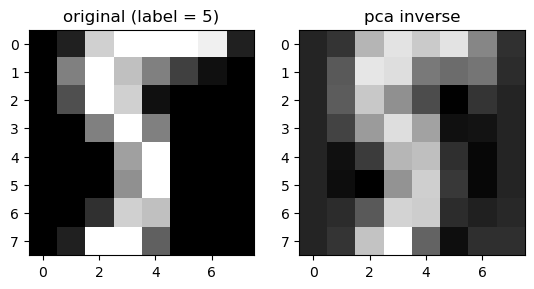

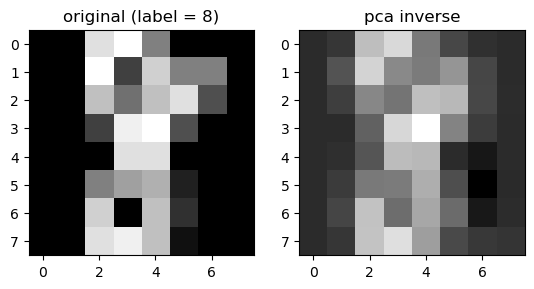

In [29]:
for _ in range(5):
    idx = np.random.randint(len(X))
    plt.subplot(121)
    plt.imshow(X[idx].reshape(8,8), cmap='gray')
    plt.title(f'original (label = {y[idx]})')
    plt.subplot(122)
    plt.imshow(X_pca_inverse[idx].reshape(8,8), cmap='gray')
    plt.title('pca inverse')
    plt.show()